In [1]:
#importing libraries 
import pandas as pd 
from datasets import load_dataset 
import matplotlib.pyplot as plt 
import ast

#loading data 
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#cleaning data 
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_exploded=df.explode('job_skills')

<Axes: xlabel='job_skills'>

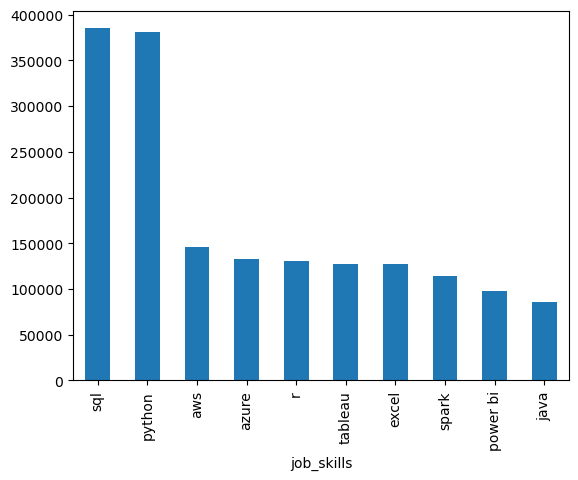

In [7]:
df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')

In [12]:
skills_count = df_exploded.groupby(['job_title_short', 'job_skills']).size()
type(skills_count)

pandas.core.series.Series

In [18]:
df_skills_count = skills_count.reset_index(name='skills_count')
df_skills_count= df_skills_count.sort_values('skills_count', ascending = False)
df_skills_count

,job_title_short,job_skills,skills_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


In [38]:
job_title = 'Data Engineer'
top_skills = 10 


df_skills_final = df_skills_count[df_skills_count['job_title_short']==job_title].head(top_10skills)
df_skills_final

,job_title_short,job_skills,skills_count
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
686,Data Engineer,aws,62049
687,Data Engineer,azure,60674
860,Data Engineer,spark,53656
763,Data Engineer,java,35559
770,Data Engineer,kafka,29073
755,Data Engineer,hadoop,28815
848,Data Engineer,scala,28716
712,Data Engineer,databricks,27477


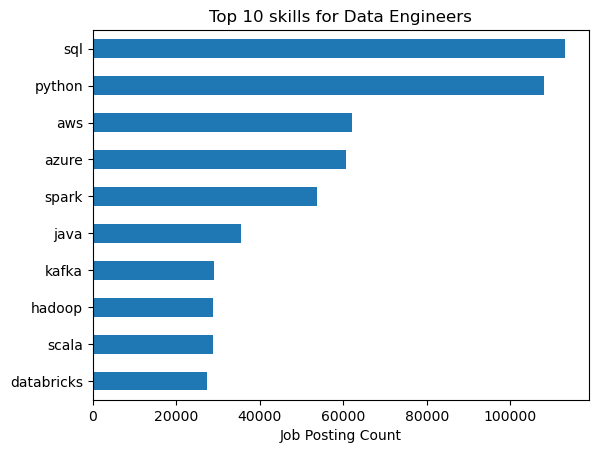

In [47]:
job_title = 'Data Engineer'
top_skills = 10 

df_skills_final.plot(kind = 'barh', x = 'job_skills', y='skills_count')
plt.gca().invert_yaxis()
plt.title(f"Top {top_skills} skills for {job_title}s")
plt.xlabel('Job Posting Count')
plt.ylabel('')
plt.legend().set_visible(False)